# **FB-31 Vasalatii Anton, Task 5** 
___
## ***Dataset*** 
**Source**: Chen, S. (2015). Beijing PM2.5 [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5JS49.

**General**: This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.  

**Subject Area**: Climate and Environment  

**Associated Tasks**:  Regression

**Dataset Characteristics**: Multivariate, Time-Series  

**Instances**: 43824  

**Columns count**: 13 

**Missing values**: Yes  

**Additional info**: The data's time period is between Jan 1st, 2010 to Dec 31st, 2014. Missing data are denoted as "NA".
___
### **Variables info**
**No**: row number

**year**: year of data in this row

**month**: month of data in this row

**day**: day of data in this row

**hour**: hour of data in this row

**pm2.5**: PM2.5 concentration

**DEWP**: Dew Point

**TEMP**: Temperature

**PRES**: Pressure

**cbwd**: Combined wind direction

**Iws**: Cumulated wind speed  

**Is**: Cumulated hours of snow

**Ir**: Cumulated hours of rain  
___

**Setup imports**

In [48]:
from colorama import Fore, Style
import pandas as pd
import numpy as np
import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress_grid

**Additional functions that use python-tabulate and colorama to make output beautiful** 

In [49]:
def print_df(frame):
    print(Fore.LIGHTCYAN_EX + tabulate.tabulate(frame, headers='keys', tablefmt="heavy_grid", showindex=False) + Style.RESET_ALL)

In [50]:
def print_delimiter():
    print(Fore.LIGHTMAGENTA_EX+"_"*135+"\n"+Style.RESET_ALL)

In [51]:
def print_double_delimiter():
    print(Fore.LIGHTYELLOW_EX+"_"*135+"\n"+"_"*135+Style.RESET_ALL)

In [52]:
def print_green_cyan_colored_pair(tag, value, indentation=''):
    print(indentation + Fore.LIGHTGREEN_EX + tag + " " + Fore.CYAN + str(value) + Style.RESET_ALL)

**Parsing data with Pandas**  
Here we read cleaned data from task1

In [53]:
headers = ['No', 'Year', 'Month', 'Day', 'Hour', 'PM2.5', 'DEWP', 'TEMP', 'PRES', 'CBWD', 'IWS','IS','IR']
df = pd.read_csv("../Lab1/beijing_pm_2_5_cleared.csv",delimiter=",",index_col=False, header=1, na_values=['NA'], names=headers)
print_df(df.head())

┏━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┓
┃   No ┃   Year ┃   Month ┃   Day ┃   Hour ┃   PM2.5 ┃   DEWP ┃   TEMP ┃   PRES ┃ CBWD   ┃   IWS ┃   IS ┃   IR ┃
┣━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━╋━━━━━━┫
┃   26 ┃   2010 ┃       1 ┃     2 ┃      1 ┃     148 ┃    -15 ┃     -4 ┃   1020 ┃ SE     ┃  2.68 ┃    0 ┃    0 ┃
┣━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━╋━━━━━━┫
┃   27 ┃   2010 ┃       1 ┃     2 ┃      2 ┃     159 ┃    -11 ┃     -5 ┃   1021 ┃ SE     ┃  3.57 ┃    0 ┃    0 ┃
┣━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━╋━━━━━━┫
┃   28 ┃   2010 ┃       1 ┃     2 ┃      3 ┃     181 ┃     -7 ┃     -5 ┃   1022 ┃ SE     ┃  5.36 ┃    1 ┃    0 ┃
┣━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━

### **Multiple Linear Regression**

**Building correlation matrix**  
We use pandas.DataFrame.corr (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)  
to compute pairwise correlation of columns and then show it using seaborn heatmap

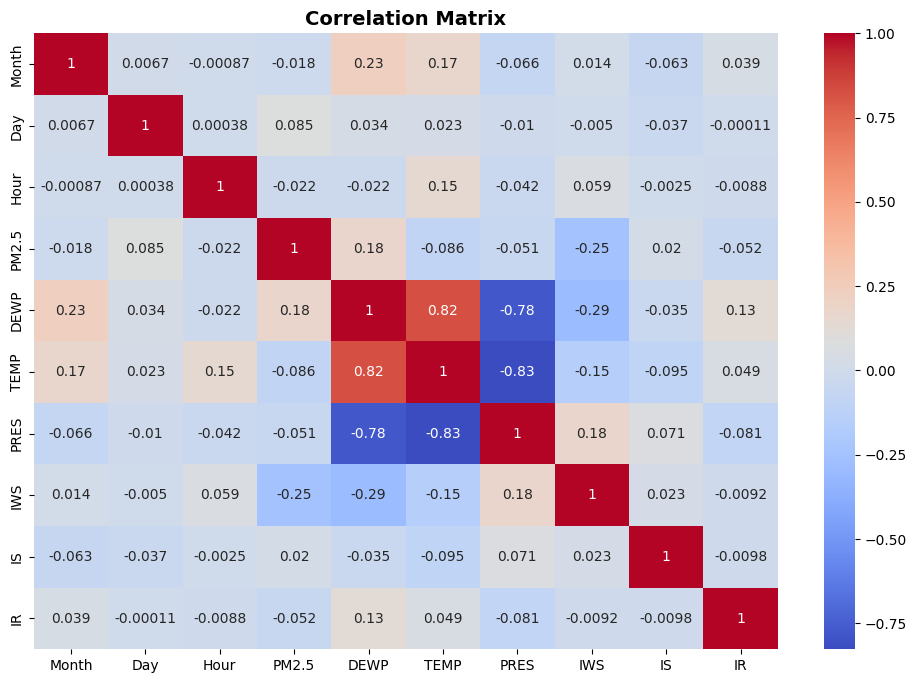

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['Month', 'Day', 'Hour', 'PM2.5', 'DEWP', 'TEMP', 'PRES', 'IWS','IS','IR']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontweight="bold", fontsize=14)
plt.show()

**Selecting the features for the model**  
Let's predict DEWP. As independent values we will use TEMP, IWS and IR.  
Firstly, we will scale them

In [55]:
independent_features = ['TEMP', 'IWS', 'IR']
dependent_feature = 'DEWP'
X = df[independent_features]
y = df[dependent_feature]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Fitting the model**  
Secondly, we will split data into two parts using train_test_split - 65% will go for training and 35% for testing.  
After that we will create model and print summary that includes coefs, theirs SE, t-stats and R^2.
 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=15)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

summary = model.summary() 
print(f"{Fore.CYAN}{summary}{Style.RESET_ALL}")

                            OLS Regression Results                            
Dep. Variable:                   DEWP   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                 2.274e+04
Date:                Mon, 13 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:23:39   Log-Likelihood:                -93906.
No. Observations:               27125   AIC:                         1.878e+05
Df Residuals:                   27121   BIC:                         1.879e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7373      0.047     37.088      0.0

**Linear regression equation**

In [57]:
coefs = model.params

equation_terms = []
for i in range(1, len(coefs)):
    coef = coefs.iloc[i]
    sign = "+" if coef >= 0 else "-"
    equation_terms.append(f"{sign} {abs(coef):.5f} * x_{i}")

equation = f"y = {coefs.iloc[0]:.5f} " + " ".join(equation_terms)

print_green_cyan_colored_pair("Linear regression equation:", equation)


Linear regression equation: y = 1.73725 + 11.49645 * x_1 - 2.51874 * x_2 + 1.21940 * x_3


**Visualizing regression via partial regression plot (using plot_partregress_grid from statsmodels.graphics.regressionplots)**

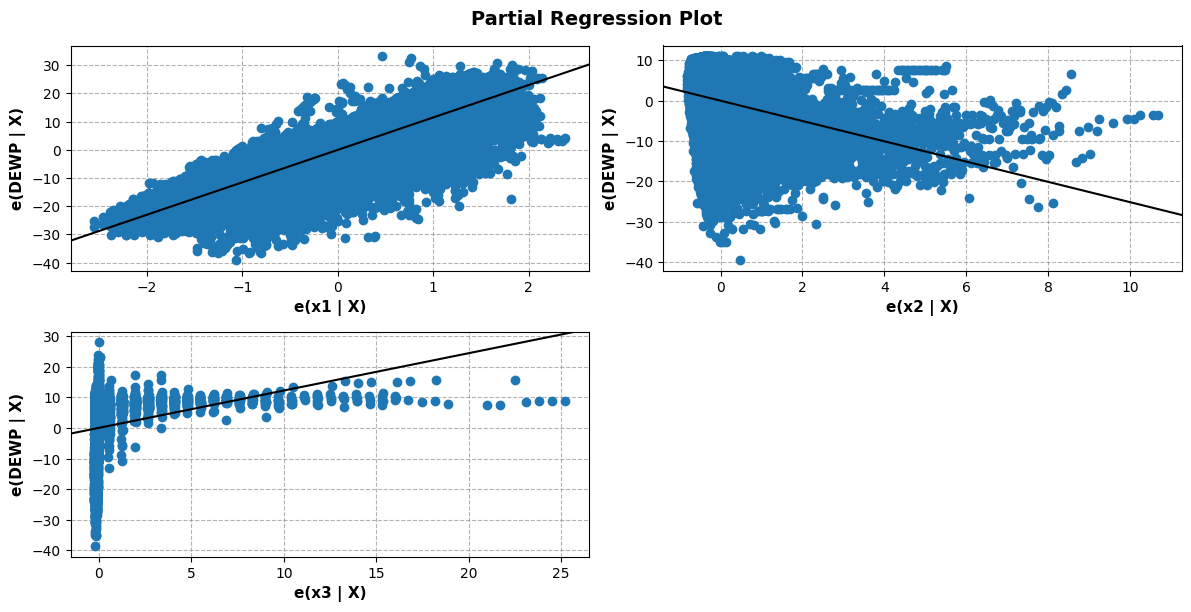

In [58]:
exog_vars = [var for var in model.model.exog_names if var != 'const']

fig = plt.figure(figsize=(12, 6))
plot_partregress_grid(model, exog_idx=exog_vars, fig=fig)

for ax in fig.axes:
    ax.grid(True, linestyle="--", alpha=0.6, color="gray")
    ax.title.set_fontweight("bold")
    ax.title.set_fontsize(12)
    ax.xaxis.label.set_fontweight("bold")
    ax.yaxis.label.set_fontweight("bold")
    ax.xaxis.label.set_fontsize(11)
    ax.yaxis.label.set_fontsize(11)

plt.suptitle("Partial Regression Plot", fontsize=14, fontweight="bold", y=1.01)
plt.show()


In [59]:

y_pred = model.predict(X_test_const)

**Scoring regression using RSS, RMSE, RSE, R^2 and t_b**

TSS:

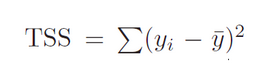
  
RSS:

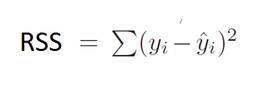

RMSE:

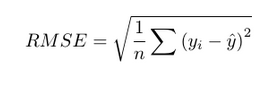  

RSE:

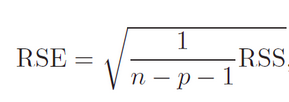

R^2:

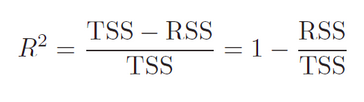

In [60]:
def calc_rss(pred, actual):
    if len(pred) != len(actual):
        raise ValueError("Length of predicted values array should be equal to actual")
    return np.sum((np.array(actual) - np.array(pred))**2)

In [61]:
n = len(y_test)
rss = calc_rss(y_pred, y_test)
print_green_cyan_colored_pair("RSS:",rss)

rmse = (rss/n)**0.5
print_green_cyan_colored_pair("RMSE:",rmse)

p = len(independent_features)
rse = (rss/(n-p-1))**0.5

print_green_cyan_colored_pair("RSE:",rse)

y_test_mean = np.mean(y_test)
r_2 = 1 - (rss / np.sum((y_test - y_test_mean)**2))
print_green_cyan_colored_pair("R^2:",r_2)

print_delimiter()

from sklearn.metrics import root_mean_squared_error, r2_score
print_green_cyan_colored_pair("RMSE from sklearn", root_mean_squared_error(y_test, y_pred))
print_green_cyan_colored_pair("R^2 from sklearn",r2_score(y_test, y_pred))


RSS: 861567.5539187456
RMSE: 7.680051867074692
RSE: 7.681103640822032
R^2: 0.7147954561485896
_______________________________________________________________________________________________________________________________________

RMSE from sklearn 7.680051867074692
R^2 from sklearn 0.7147954561485896


**Predicting three values ​​based on values ​​outside the dataset**

In [62]:
x_max = df[independent_features].max().values

n=3
X_new = [[x_max[i] + j for i in range(len(x_max))] for j in range(1, n+1)]

df_new = pd.DataFrame(X_new, columns=independent_features)

X_new = scaler.fit_transform(X_new)
X_new_const = sm.add_constant(X_new)

df_new[dependent_feature] = model.predict(X_new_const)

print_df(df_new)

┏━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━━━━┓
┃   TEMP ┃    IWS ┃   IR ┃      DEWP ┃
┣━━━━━━━━╋━━━━━━━━╋━━━━━━╋━━━━━━━━━━━┫
┃     43 ┃ 566.49 ┃   37 ┃ -10.7516  ┃
┣━━━━━━━━╋━━━━━━━━╋━━━━━━╋━━━━━━━━━━━┫
┃     44 ┃ 567.49 ┃   38 ┃   1.73725 ┃
┣━━━━━━━━╋━━━━━━━━╋━━━━━━╋━━━━━━━━━━━┫
┃     45 ┃ 568.49 ┃   39 ┃  14.2261  ┃
┗━━━━━━━━┻━━━━━━━━┻━━━━━━┻━━━━━━━━━━━┛


### **Summary**

**In this task, we practically used the theoretical knowledge we gained about multiple linear regression by creating it.**   
**We started with creating a pairwise correlation matrix with Spearman coefficient. After examining it, we chose DEWP as the dependent variable and IWS, TEMP IR as the independent variables.**    
**We then built the model using statsmodels.api.OLS and visualized it by drawing a partial regression plot (plot_partregress_grid from statsmodels.graphics.regressionplots).**  

**Linear regression equation: y = 1.73725 + 11.49645 * x_1 - 2.51874 * x_2 + 1.21940 * x_3**

| Variable | Coefficient | Std Error | t-statistic |
|----------|-------------|-----------|-------------|
| x1       | 11.4965     | 0.047     | 242.080     |
| x2       | -2.5187     | 0.048     | -52.716     |
| x3       | 1.2194      | 0.047     | 25.975      |

**Scores:**

**RSS: 861567.5539187456**

**RMSE: 7.680051867074692**

**RSE: 7.681103640822032**

**R^2: 0.7147954561485896**

**Also we predicted three values ​​based on values ​​outside the dataset:**

| TEMP |   IWS   | IR |   DEWP    |
|:----:|:-------:|:--:|:---------:|
|  43  | 566.49  | 37 | -10.7516  |
|  44  | 567.49  | 38 |  1.73725  |
|  45  | 568.49  | 39 | 14.2261   |
